## Missing values in `year`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

scriptum_df = pd.read_json("https://raw.githubusercontent.com/CCS-ZCU/scriptum/refs/heads/master/data/files_df.json")


In [3]:
def percentage(m,n):
    return round(m/n*100, 3)

N = scriptum_df.shape[0]
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 1144 -- 9.85%
Samizdat: 236 -- 2.032%
Exil: 908 -- 7.818%


In [4]:
# Extract year from filename for rows with no year
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if match := re.search(r"\d{4}(?!\d)", filename):
        scriptum_df.at[idx, 'year'] = float(match.group())

In [5]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 265 -- 2.282%
Samizdat: 229 -- 1.972%
Exil: 36 -- 0.31%


In [6]:
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if '88' in filename:
        scriptum_df.at[idx, 'year'] = 1988.0
    elif '89' in filename:
        scriptum_df.at[idx, 'year'] = 1989.0
    elif '87' in filename:
        scriptum_df.at[idx, 'year'] = 1987.0
    elif '51' in filename and scriptum_df.at[idx, 'filename'] == 'novy-brak_05_chybi-str-51_ocr.txt':
        # see https://scriptum.cz/cs/periodika/novy-brak
        scriptum_df.at[idx, 'year'] = 1983.0
    elif '71' in filename:
        # see https://scriptum.cz/cs/periodika/poradni-svitek
       continue
    else:
        continue

scriptum_df.loc[scriptum_df['periodical_title'] == 'Bulletin NMS v Liberci', 'year'] = 1989.0

All alterations seem legible

In [7]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 233 -- 2.006%
Samizdat: 197 -- 1.696%
Exil: 36 -- 0.31%


All alterations seem legible and other can be added manually from https://scriptum.cz/

[Text(0, 0, '0M'),
 Text(0, 10000000, '10M'),
 Text(0, 20000000, '20M'),
 Text(0, 30000000, '30M'),
 Text(0, 40000000, '40M')]

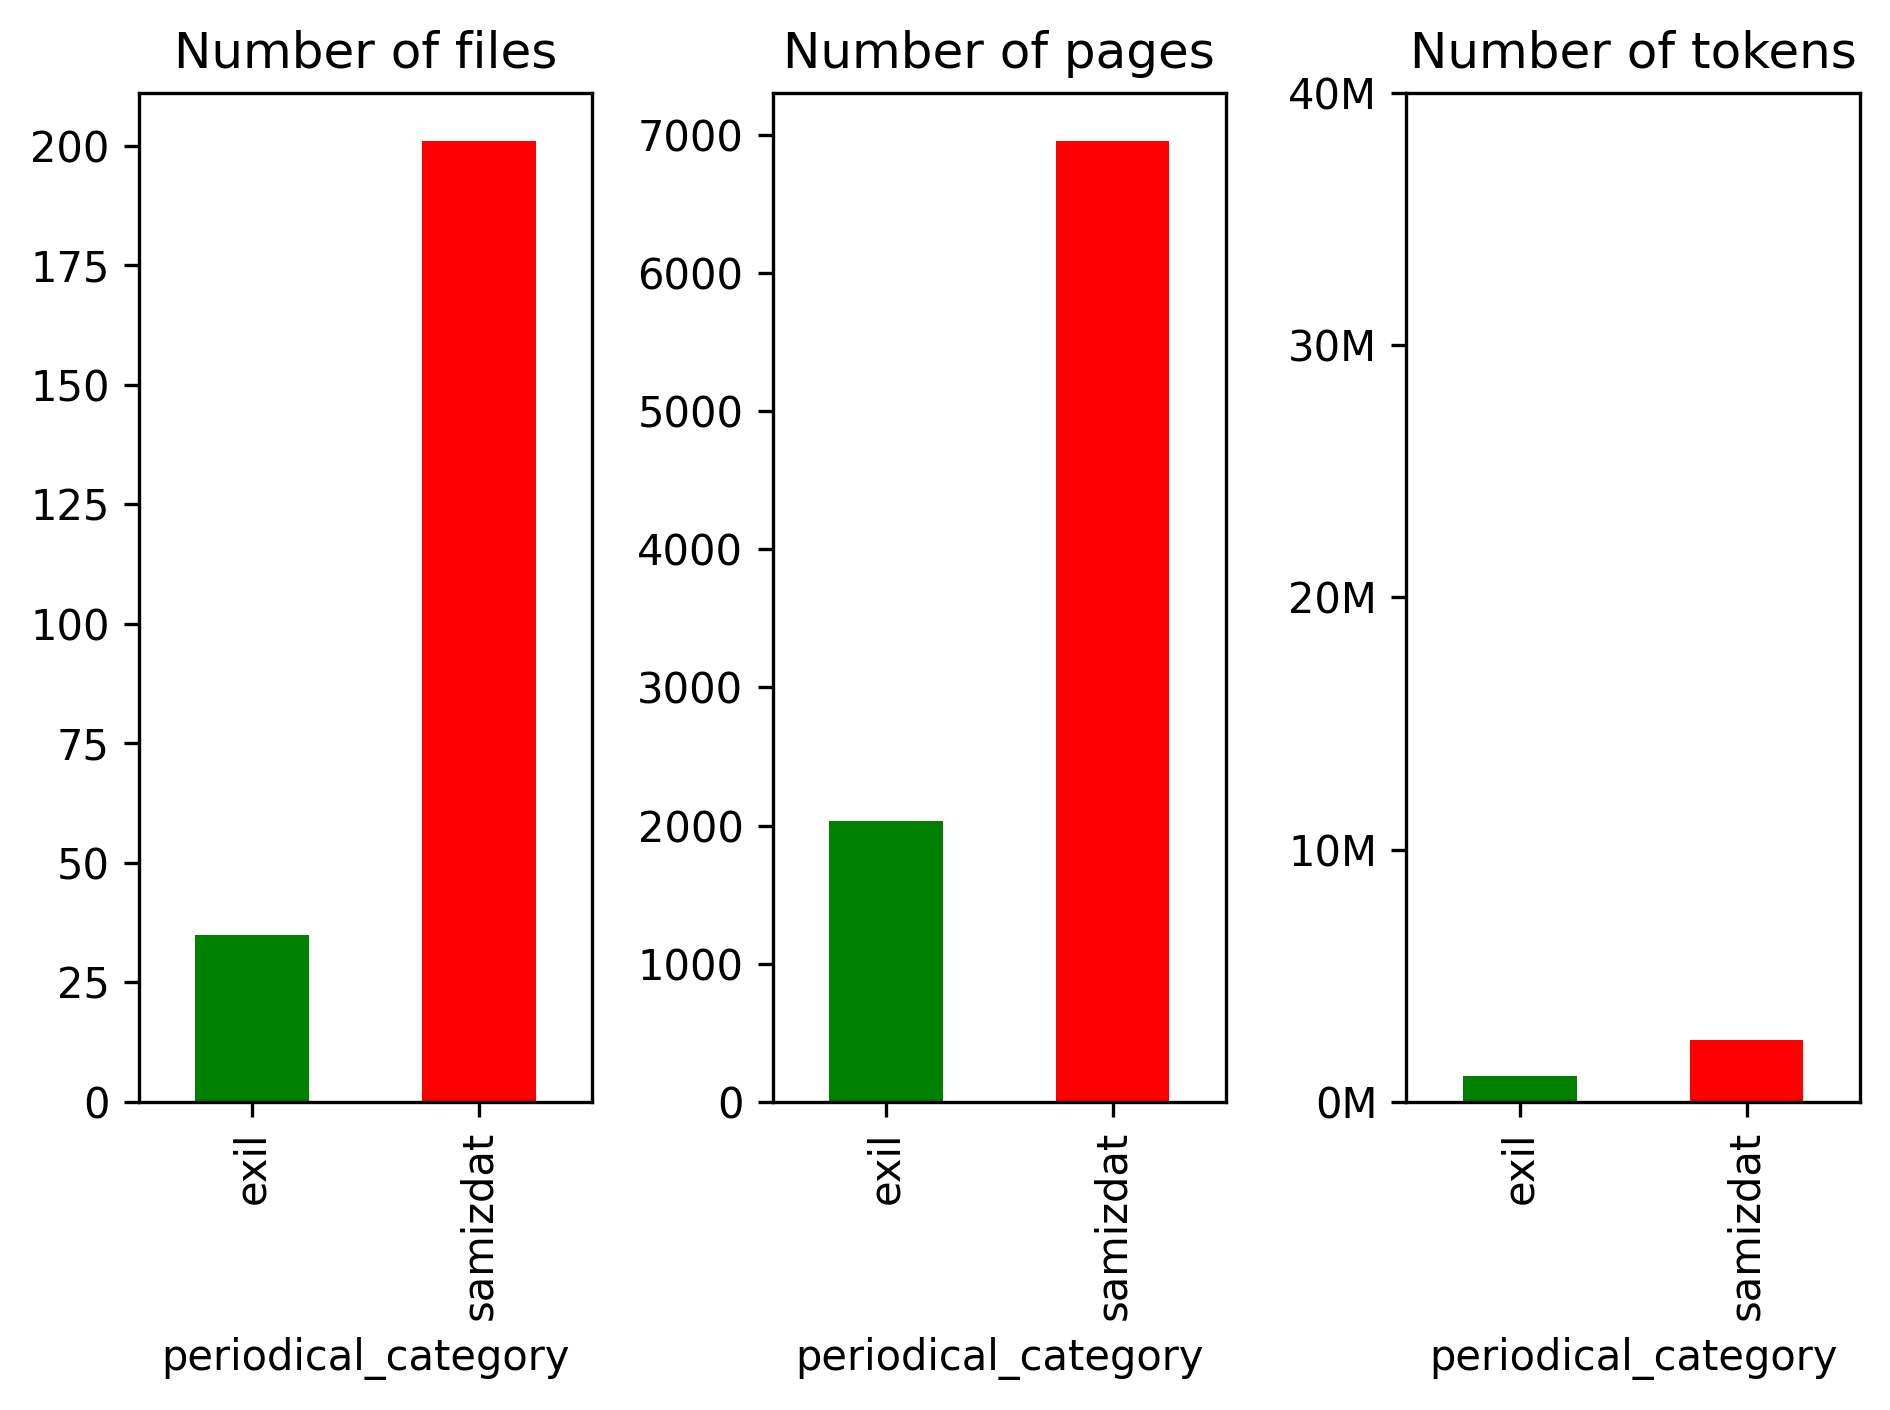

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=300, tight_layout=True)
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category").size().plot(kind='bar', color=["green", "red"], ax=axs[0])
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category")["pages_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[1])
scriptum_df[scriptum_df.year.isna()].groupby("periodical_category")["tokens_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[2])

axs[0].set_title("Number of files")
axs[1].set_title("Number of pages")
axs[2].set_title("Number of tokens")

N, M = 50, 10
axs[2].set_yticks(range(0, N * 1000000, M*1000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,N,M)])